### basic processing of a voice signal
* STFT
* F0
* MFCC


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import seaborn as ans

In [2]:
filename = "voice_clips_list_cleaned.csv"
list_clip = pd.read_csv(filename)

* some selected audio files in the common voice collection
* audiofile = list_clip.path[100]
* audiofile = "common_voice_en_32810621.mp3" # eighties female
* audiofile = "common_voice_en_30282850.mp3" # fifties female
* audiofile = "common_voice_en_32879293.mp3" # eighties male
* audiofile = "common_voice_en_32260076.mp3" # twenties female
* audiofile = "common_voice_en_20002554.mp3" # sixties male
* audiofile = "common_voice_en_30615145.mp3"  # teen male

In [3]:
data_dir = '/Users/yingli/Development/TopicsInDataScience/cv-corpus-19.0-2024-09-13/en/clips/'
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile)
x.shape, sr

((143678,), 22050)

### notice the sampling rate returned by librosa load

In [4]:
x, sr = librosa.load(data_dir+audiofile, sr = None) # taking the original sampling rate of the mp3 file
print(x.shape, sr)
x, sr = librosa.load(data_dir+audiofile, sr = 8000) #resampling at 8000
print(x.shape, sr)


(208512,) 32000
(52128,) 8000


### compute stft

In [5]:
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile,sr=None)
D = librosa.stft(y=x)
x.shape, sr, D.shape

((208512,), 32000, (1025, 408))

In [6]:
D.shape[0] == 1 + 2048/2, D.shape[1] * (2048/4),  x.shape[0]

(True, 208896.0, 208512)

In [7]:
type(D[0,0])

numpy.complex64

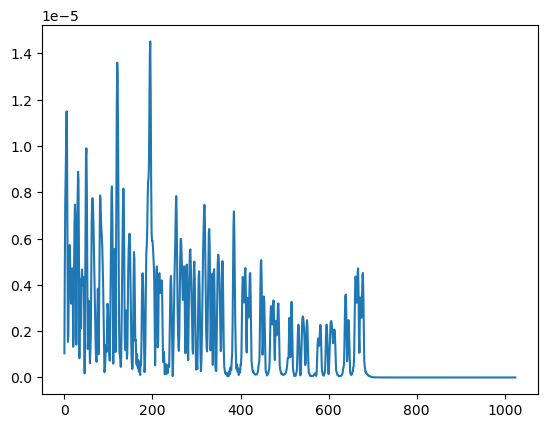

In [8]:
plt.plot(np.abs(D[:,0]))

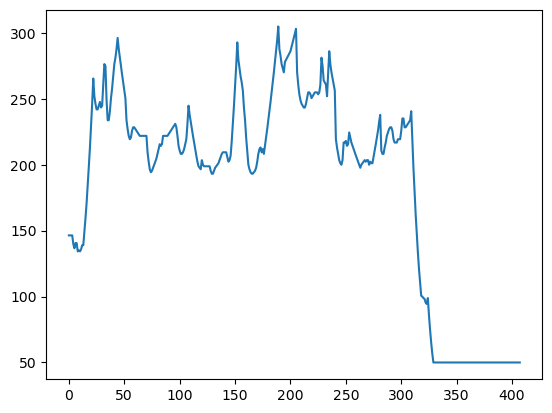

In [9]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr, fmin=50, fmax=1000, fill_na=None)
plt.plot(f0)

In [10]:
f0.shape, voiced_flag.shape, voiced_probs.shape, x.shape[0]/f0.shape[0]

((408,), (408,), (408,), 511.05882352941177)

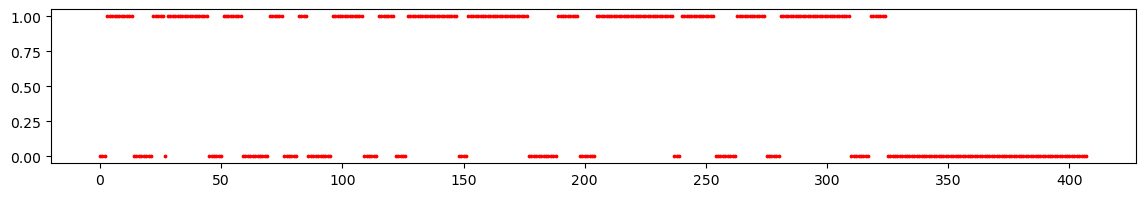

In [11]:
plt.figure(figsize=(14, 2))
plt.scatter(range(voiced_flag.shape[0]),voiced_flag*1, s=3,color = "r")

In [12]:
voiced_flag[50:60], f0[50:60]

(array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        False]),
 array([256.38881638, 250.53288772, 233.75544971, 227.10088581,
        221.91389441, 219.36499594, 220.63576443, 225.79288096,
        228.41646786, 228.41646786]))

### compute mel-spectrom

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

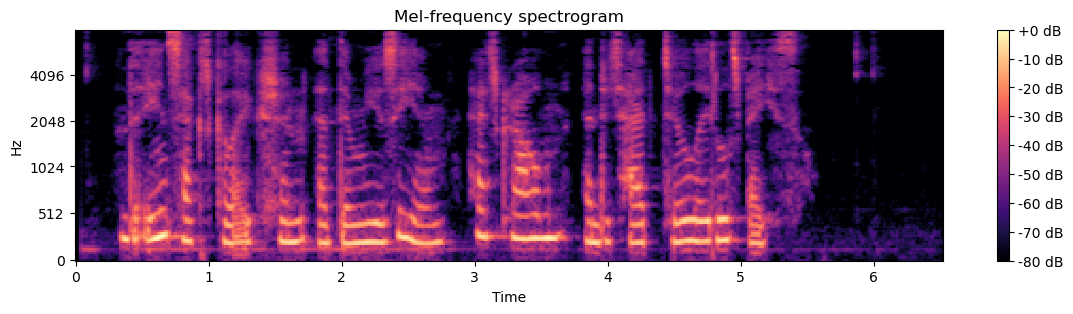

In [13]:
fig, ax = plt.subplots(figsize=(14, 3))

S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [14]:
# sampling rate for 125 microsecond sampling gap 
# number of smaple for signal of 32 miliseconds length
1/0.000125, 32/0.125

(8000.0, 256.0)

In [15]:
M = librosa.feature.melspectrogram(y=x, sr=sr, n_mels = 128)
M.shape

(128, 408)

In [16]:
D = np.abs(librosa.stft(x))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

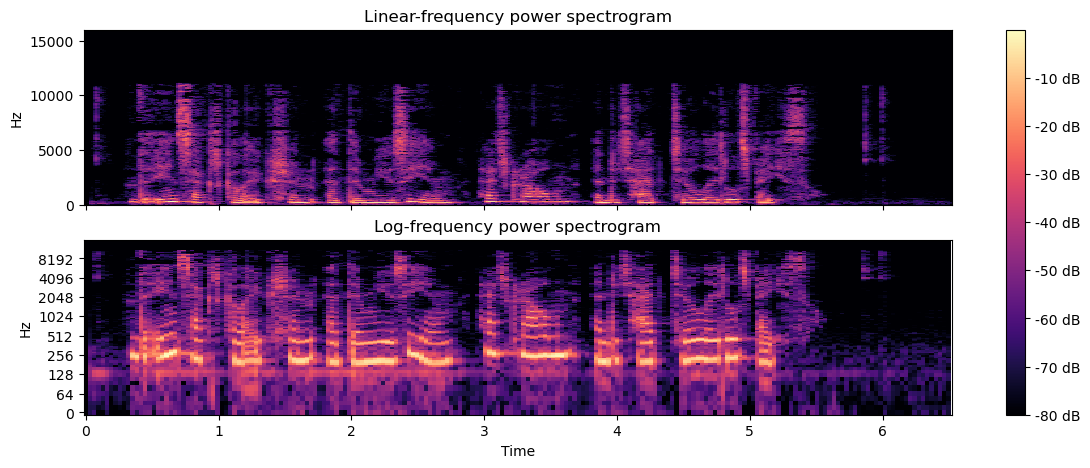

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (14,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time', 
                         sr=sr, hop_length=hop_length, ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [18]:
tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)
print('Estimated tempo: {:.2f} beats per minute', format(tempo))

Estimated tempo: {:.2f} beats per minute [98.68421053]


In [19]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([0.752, 1.392, 2.016, 2.64 , 3.248, 3.856, 4.448, 5.088])

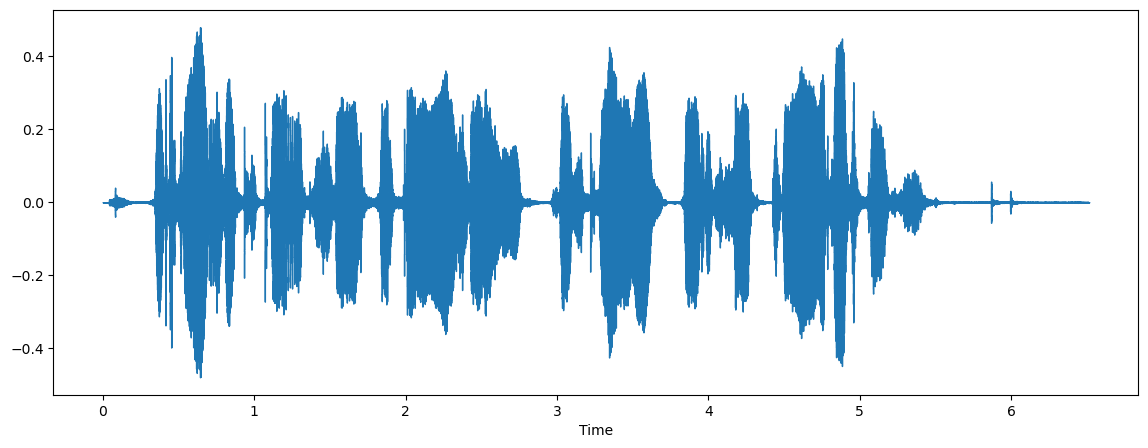

In [20]:
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

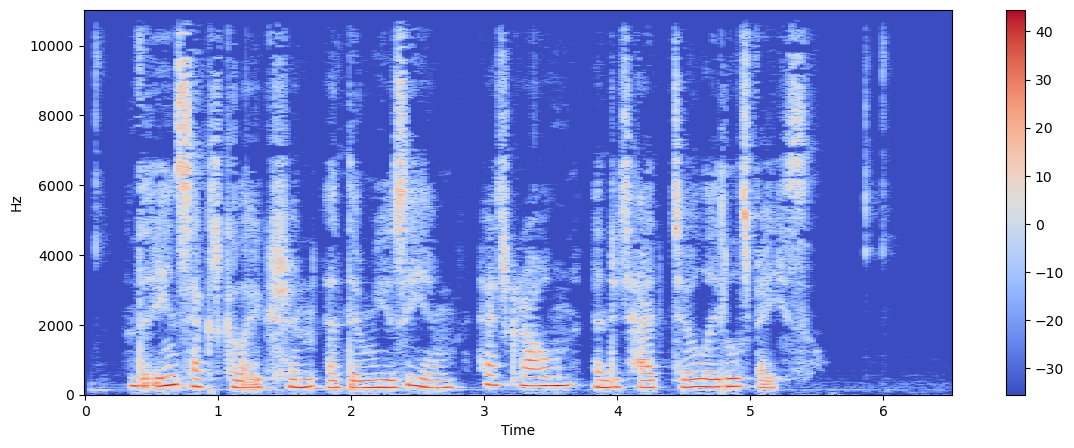

In [21]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

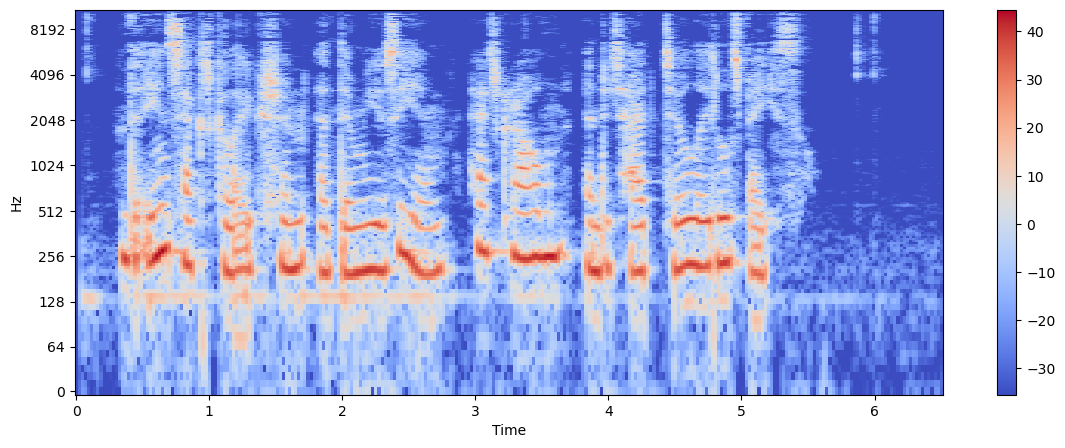

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [23]:
mfcc = librosa.feature.mfcc(y=x, sr=sr)
mfcc.shape

(20, 281)

<Axes: >

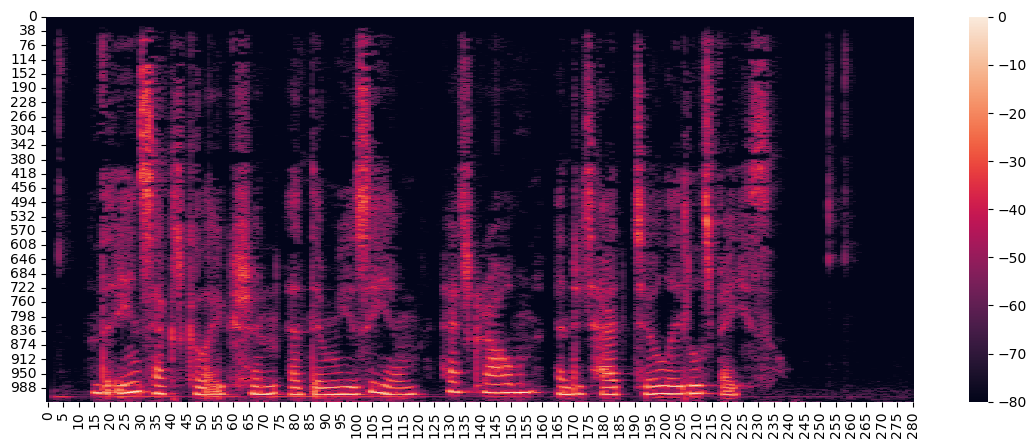

In [24]:
import seaborn as sns
plt.figure(figsize=(14, 5))
fft = librosa.stft(y=x)
sns.heatmap(np.flip(librosa.amplitude_to_db(abs(fft),ref=np.max), axis =0))

/var/folders/j8/w88cxj05115byx3n9mnk572w0000gn/T/ipykernel_66258/1179812508.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(fft,


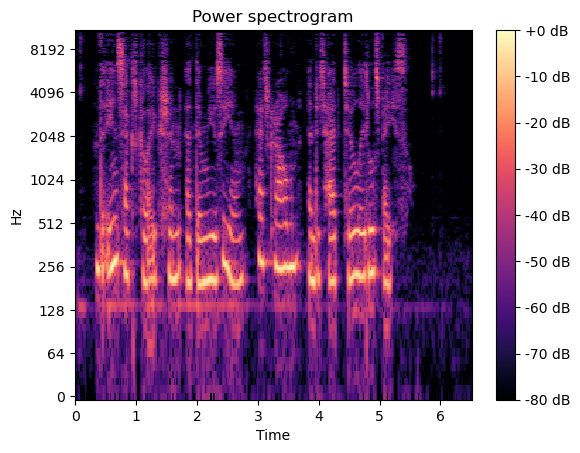

In [25]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(fft,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")